# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: Manalo Jr., Darwin P.

_Student No._: 202210113

_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: Sep. 20, 2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** **Darwin P. Manalo Jr.**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [ ]:
import numpy as np
# Defining the function in the integrand
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5

I = 1450 # Let I be the exact value of the integration obtained in WolframAlpha
N_arr = np.array([10, 100, 1000]) # Let N be the number of slices and this array was set up for different slices.
a, b = 0.0, 5.0 # Let a and b be the lower and upper limits of integration
# Applying the Trapezoidal rule
def trapezoidal(N):
  h = (b-a)/N
  s = 0.5*(f(a)+f(b))
  sum = 0 # Starting the summation at zero before putting it into a loop
  for k in range(1, N):
    sum += f(a + k*h)
  return h*(s + sum)
# Let trap_results and trap_p_error represent the values of the result and percent error of using trapezoidal rule
trap_results = np.zeros(len(N_arr))
trap_p_error = np.zeros(len(N_arr))
for i in range(len(N_arr)): #Let i be the experimental result from numerical calculation
  trap_results[i] = trapezoidal(N_arr[i])
  trap_p_error[i] = (abs(trap_results[i] - I)/I)*100

print("Numerical calculation using Trapezoidal Rule")
print(f"{'# of slices (N)':^20}{'Result':^20} {'% Error':^20}") # For better results, I used this formatting of code to tabulate the results and percent error
for i in range(len(N_arr)):
  print(f"{N_arr[i]:^20}{trap_results[i]:^20} {trap_p_error[i]:^20}")
print("") # space between

# Applying the Simpson's Rule
def simpson(N):
  h = (b-a)/N
  s_odd, s_even = 0, 0 # Let s_odd and s_even represents the odd and even values of k, respectively
  for k in range(1, N, 2):
    s_odd += f(a + k*h)
  for k in range(2, N, 2):
    s_even += f(a + k*h)
  return 1/3*h*(f(a) + f(b) + 4*s_odd + 2*s_even)
# Let simp_results and simp_p_error represent the values of the results and percent error using Simpson's rule
simp_results = np.zeros(len(N_arr))
simp_p_error = np.zeros(len(N_arr))
for i in range(len(N_arr)):
  simp_results[i] = simpson(N_arr[i])
  simp_p_error[i] = (abs(simp_results[i] - I)/I)*100

print("Numerical calculation using Simpson's Rule") # For better results, I used this formatting of code to tabulate the results and percent error
print(f"{'# of slices (N)':^20}{'Result':^20} {'% Error':^20}")
for i in range(len(N_arr)):
  print(f"{N_arr[i]:^20}{simp_results[i]:^20} {simp_p_error[i]:^20}")


Numerical calculation using Trapezoidal Rule
  # of slices (N)          Result              % Error       
         10              1471.4375        1.478448275862069  
        100          1450.2145812500003  0.014798706896569988
        1000         1450.0021458331234  0.00014798849127240326

Numerical calculation using Simpson's Rule
  # of slices (N)          Result              % Error       
         10          1450.0833333333333  0.005747126436776382
        100          1450.0000083333337  5.747126657485657e-07
        1000         1450.0000000008342  5.753338035870472e-11


### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [ ]:
import numpy as py
from numpy import linspace, cos, pi, tan, ones, copy # This function returns the sample points and weights for Gaussian quadrature
# Applying Gaussian Quadrature
def gaussxw(N):
  # Initial approximation to roots of the Legendre polynomial
  a = linspace(3,4*N-1,N)/(4*N+2)
  x = cos(pi*a+1/(8*N*N*tan(a)))
  epsilon = 1e-15
  delta = 1.0
  while delta>epsilon:
   p0 = ones(N,float)
   p1 = copy(x)
   for k in range(1,N):
    p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1) # Getting the recurrence relation of the Legendre polynomial
   dp = (N+1)*(p0-x*p1)/(1-x*x)
   dx = p1/dp
   x -= dx
   delta= max(abs(dx))
# Calculate the weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
  return x,w
# Defining the given function
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5
N = 3
a, b = 0.0, 5.0
x,w = gaussxw(N)
x_rescale = 0.5*(b-a)*x + 0.5*(b+a) # This rescales the sample points and weights for the given domain [a, b]
w_rescale = 0.5*(b-a)*w
I = 0
for k in range(N):
  I += w_rescale[k]*f(x_rescale[k]) # This calculates the sum to get the estimated value of the integral

print("Approximation using Gaussian Qaudrature:")
print(I)

Approximation using Gaussian Qaudrature:
1450.000000000002


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

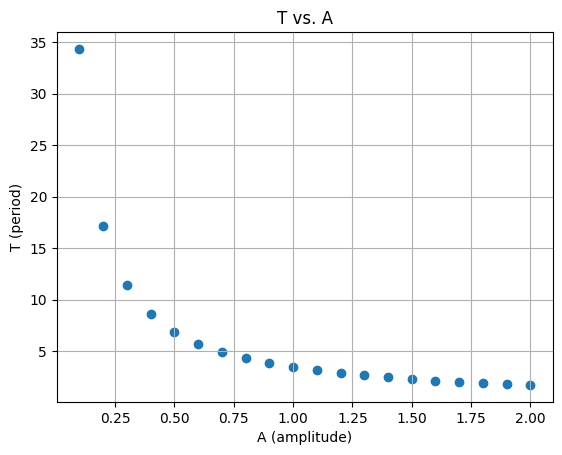

In [1]:
import numpy as np
from numpy import linspace, cos, pi, tan, ones, copy
import matplotlib.pyplot as plt
from math import sqrt
# Initial values given
N = 20 # Number of points
a = 2 # a is the upper-bound amplitude
m = 1 # Where m is the mass
# Applying Gaussian Quadrature
def gaussxw(N):
  a = linspace(3,4*N-1,N)/(4*N+2)
  x = cos(pi*a+1/(8*N*N*tan(a)))
  epsilon = 1e-15
  delta = 1.0
  while delta>epsilon:
   p0 = ones(N,float)
   p1 = copy(x)
   for k in range(1,N):
    p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
   dp = (N+1)*(p0-x*p1)/(1-x*x)
   dx = p1/dp
   x -= dx
   delta= max(abs(dx))
# Calculate the weights
  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
  return x,w # we return the values of the weight and values of the Legendre Polynomial
# Defining the given potential
def V(x):
  return x**4

def integrand(x, a):
  return 1/sqrt(V(a)-V(x)) # Note that x must not be equal to a since the denominator will be zero if x==a

# Calculating the Period (T)
def T(a, N):
# Approximating the value of the integral
  x,w = gaussxw(N)
  # Rescaling x and w according to the given values of "a"
  x_rescale = 0.5*(a)*x + 0.5*(a)
  w_rescale = 0.5*(a)*w
  # Let I be the estimated value of integration and performing the summation
  I = 0
  for k in range(1, N):
    I += w_rescale[k]*integrand(x_rescale[k], a)
  # Multiplying the integral with sqrt of 8m
  return sqrt(8*m)*I

# Plotting T versus a
n = 20 # Let n be the number of points of the plot
a_plot = np.zeros(n) # A as the x-axis
T_plot = np.zeros(n) # T as the y-axis

for i in range(n): # for loop for x-axis (amplitude)
  a_plot[i] = a/n * (i+1)
for i in range(n): # for loop for y-axis (Period)
  T_plot[i] = T(a_plot[i], N)
# Plotting the graph
plt.scatter(a_plot, T_plot)
plt.xlabel("A (amplitude)")
plt.ylabel("T (period)")
plt.title("T vs. A")
plt.grid()
plt.show()
# We expect the graph to scale as 1/a since the value of the integral diverges as a increases.

The graph has an asymptotic feature describing the relationship between the amplitude and period as a scale of 1/a relation which states that the period decreases with the increase of the amplitude so it means that the period of oscillation decreases as the amplitude of the anharmonic oscillator increases.
